In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


In [117]:
df = pd.read_csv("tennis_stats.csv")

In [118]:
df

,Player,Year,FirstServe,FirstServePointsWon,FirstServeReturnPointsWon,SecondServePointsWon,SecondServeReturnPointsWon,Aces,BreakPointsConverted,BreakPointsFaced,...,ReturnGamesWon,ReturnPointsWon,ServiceGamesPlayed,ServiceGamesWon,TotalPointsWon,TotalServicePointsWon,Wins,Losses,Winnings,Ranking
0,Pedro Sousa,2016,0.88,0.50,0.38,0.50,0.39,0,0.14,7,...,0.11,0.38,8,0.50,0.43,0.50,1,2,39820,119
1,Roman Safiullin,2017,0.84,0.62,0.26,0.33,0.07,7,0.00,7,...,0.00,0.20,9,0.67,0.41,0.57,0,1,17334,381
2,Pedro Sousa,2017,0.83,0.60,0.28,0.53,0.44,2,0.38,10,...,0.16,0.34,17,0.65,0.45,0.59,4,1,109827,119
3,Rogerio Dutra Silva,2010,0.83,0.64,0.34,0.59,0.33,2,0.33,5,...,0.14,0.34,15,0.80,0.49,0.63,0,0,9761,125
4,Daniel Gimeno-Traver,2017,0.81,0.54,0.00,0.33,0.33,1,0.00,2,...,0.00,0.20,2,0.50,0.35,0.50,0,1,32879,272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1716,Yann Marti,2010,0.41,0.66,0.23,0.45,0.50,1,0.75,8,...,0.23,0.36,12,0.67,0.45,0.53,0,1,9117,1062
1717,Mikhail Elgin,2012,0.41,0.60,0.30,0.36,0.60,3,0.60,13,...,0.33,0.43,10,0.40,0.45,0.46,16,20,89755,831
1718,Alexander Kudryavtsev,2012,0.40,0.64,0.21,0.42,0.42,4,0.25,13,...,0.07,0.29,14,0.57,0.40,0.51,0,1,44566,628
1719,Ivan Nedelko,2011,0.37,0.30,0.15,0.24,0.41,1,0.00,5,...,0.00,0.26,6,0.17,0.26,0.26,0,1,17527,264


<Figure size 432x288 with 0 Axes>

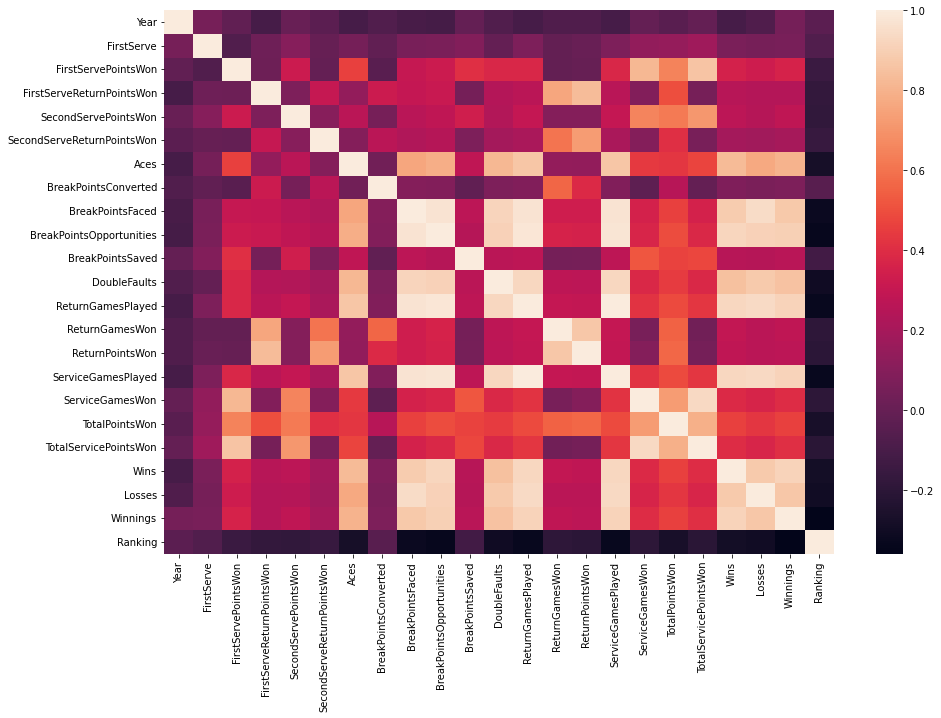

In [119]:
plt.clf()
plt.subplots(figsize = (15,10))
sns.heatmap(df.corr())
plt.show()

In [120]:
df.corr()["Wins"]

Year                         -0.108235
FirstServe                    0.064832
FirstServePointsWon           0.356702
FirstServeReturnPointsWon     0.256029
SecondServePointsWon          0.268979
SecondServeReturnPointsWon    0.193093
Aces                          0.825301
BreakPointsConverted          0.076989
BreakPointsFaced              0.883470
BreakPointsOpportunities      0.923453
BreakPointsSaved              0.252053
DoubleFaults                  0.847459
ReturnGamesPlayed             0.928408
ReturnGamesWon                0.292920
ReturnPointsWon               0.280240
ServiceGamesPlayed            0.929153
ServiceGamesWon               0.385040
TotalPointsWon                0.459368
TotalServicePointsWon         0.399270
Wins                          1.000000
Losses                        0.878732
Winnings                      0.913297
Ranking                      -0.287018
Name: Wins, dtype: float64

In [121]:
x_values = df[["FirstServePointsWon", "FirstServeReturnPointsWon", "SecondServePointsWon", "SecondServeReturnPointsWon", "Aces", "BreakPointsFaced", "BreakPointsOpportunities", "BreakPointsSaved", "DoubleFaults", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon", "ServiceGamesPlayed", "ServiceGamesWon", "TotalPointsWon", "TotalServicePointsWon"]]

y_values = df["Wins"]

print(len(x_values))

1721


In [122]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size= 0.1, random_state = 1)

In [123]:
model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [124]:
model.score(x_train, y_train)
model.score(x_test, y_test)

0.9137072276258208

In [125]:
y_predict = model.predict(x_test)

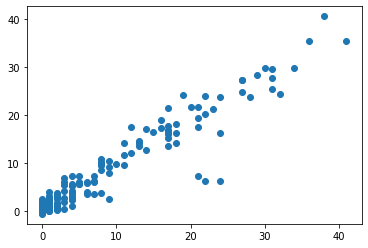

In [126]:
plt.clf()
plt.scatter(y_test, y_predict)
plt.show()

# Muestra una gran eficiencia 

In [127]:
# Seleccionar vlaores para predecir tasa de winning 

# Valores con mayor correlacion a ganar
df_values = df[["FirstServePointsWon", "FirstServeReturnPointsWon", "SecondServePointsWon", "SecondServeReturnPointsWon", "Aces", "BreakPointsFaced", "BreakPointsOpportunities", "BreakPointsSaved", "DoubleFaults", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon", "ServiceGamesPlayed", "ServiceGamesWon", "TotalPointsWon", "TotalServicePointsWon"]]

df_mean = df_values.describe().loc["mean"].reset_index()
df_max = df_values.describe().loc["max"].reset_index()
df_min = df_values.describe().loc["min"].reset_index()

df_values = pd.merge(df_mean, df_max, how = "inner", on = "index")
df_values = pd.merge(df_values, df_min, how = "inner", on = "index")

print(df_values)

                         index        mean      max   min
0          FirstServePointsWon    0.680738     0.89  0.27
1    FirstServeReturnPointsWon    0.261673     0.48  0.00
2         SecondServePointsWon    0.479733     0.92  0.06
3   SecondServeReturnPointsWon    0.466432     0.75  0.00
4                         Aces   97.105171  1185.00  0.00
5             BreakPointsFaced  112.003486   507.00  1.00
6     BreakPointsOpportunities  102.918071   573.00  0.00
7             BreakPointsSaved    0.565386     1.00  0.00
8                 DoubleFaults   49.112144   309.00  0.00
9            ReturnGamesPlayed  198.307960   910.00  0.00
10              ReturnGamesWon    0.173823     0.56  0.00
11             ReturnPointsWon    0.342208     0.51  0.00
12          ServiceGamesPlayed  197.650203   916.00  0.00
13             ServiceGamesWon    0.715590     1.00  0.00
14              TotalPointsWon    0.473155     0.82  0.22
15       TotalServicePointsWon    0.599245     0.82  0.25


In [128]:
values_mean = list(df_values["mean"])
values_max = list(df_values["max"])

print(values_max)


values_mean = np.array(values_mean).reshape(1, -1)
values_max = np.array(values_max).reshape(1, -1)

wins_mean = model.predict(values_mean)
wins_max = model.predict(values_max)


print(wins_mean)
print(wins_max)


[0.89, 0.48, 0.92, 0.75, 1185.0, 507.0, 573.0, 1.0, 309.0, 910.0, 0.56, 0.51, 916.0, 1.0, 0.82, 0.82]
[7.86323819]
[46.29323445]


C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [129]:
# Try model with Zverev results on 2015
zverev_values = df[(df.Player.isin(["Alexander Zverev"])) & (df.Year == 2015)]

zverev_values = zverev_values[["FirstServePointsWon", "FirstServeReturnPointsWon", "SecondServePointsWon", "SecondServeReturnPointsWon", "Aces", "BreakPointsFaced", "BreakPointsOpportunities", "BreakPointsSaved", "DoubleFaults", "ReturnGamesPlayed", "ReturnGamesWon", "ReturnPointsWon", "ServiceGamesPlayed", "ServiceGamesWon", "TotalPointsWon", "TotalServicePointsWon"]].reset_index()

columns = zverev_values.columns

future_values = []

for column in columns:
    value = zverev_values[column].values
    value = value[0]
    future_values.append(value)

future_values = future_values[1:]



In [130]:
future_values = np.array(future_values).reshape(1, -1)

print(model.predict(future_values))

juan_values =[0.89, 0.50, 0.92, 0.80, 2000, 415, 774, 0.9, 538, 912, 0.88, 0.54, 912, 0.99, 0.99, 0.82]

max_values = [0.89, 0.48, 0.92, 0.75, 1185.0, 507.0, 573.0, 1.0, 309.0, 910.0, 0.56, 0.51, 916.0, 1.0, 0.82, 0.82]

juan_values = np.array(juan_values).reshape(1, -1)

print(model.predict(juan_values))



[14.08233362]
[65.17900131]


C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [131]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]

In [132]:
model = LinearRegression()

model.fit(features, outcome)

LinearRegression()

In [133]:
model.score(features, outcome)

0.8420082507436342

In [134]:
df_winning_corr = df.corr()["Winnings"].reset_index()

In [135]:
columns = df_winning_corr[df_winning_corr.Winnings > 0.5]["index"]
x_values = df[columns].drop("Winnings", axis = 1)
y_values = df["Winnings"]


print(x_values)
model = LinearRegression()
model.fit(x_values, y_values)

      Aces  BreakPointsFaced  BreakPointsOpportunities  DoubleFaults  \
0        0                 7                         7             2   
1        7                 7                         0             1   
2        2                10                         8             1   
3        2                 5                         6             0   
4        1                 2                         0             2   
...    ...               ...                       ...           ...   
1716     1                 8                         4             7   
1717     3                13                         5             3   
1718     4                13                         4             4   
1719     1                 5                         5             1   
1720     1                 8                         9             7   

      ReturnGamesPlayed  ServiceGamesPlayed  Wins  Losses  
0                     9                   8     1       2  
1              

LinearRegression()

In [136]:
data = pd.DataFrame(list(zip(x_values.columns,x_values.describe().loc["mean"], x_values.describe().loc["max"])), columns = ["feature", "mean1", "max1"])

print(data)

                    feature       mean1    max1
0                      Aces   97.105171  1185.0
1          BreakPointsFaced  112.003486   507.0
2  BreakPointsOpportunities  102.918071   573.0
3              DoubleFaults   49.112144   309.0
4         ReturnGamesPlayed  198.307960   910.0
5        ServiceGamesPlayed  197.650203   916.0
6                      Wins    7.876816    48.0
7                    Losses    9.278908    36.0


In [137]:
max_values = np.array(data["max1"].values).reshape(1, -1)
max_values[0][4] = 40
max_values[0][7] = 8

print(max_values)

print(model.predict(max_values))

print(np.amax(df["Winnings"]))

[[1185.  507.  573.  309.   40.  916.   48.    8.]]
[1082944.04827964]
1074562


C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


[1]
[[2.42197943e+01 4.60287057e+04]
 [2.64277419e+02 4.98346381e+05]
 [1.85302128e+02 3.27406587e+05]
 [3.05339130e+02 6.98498409e+05]
 [7.83638889e+01 1.63748967e+05]
 [3.34371795e+02 9.52442564e+05]]


C:\Users\Juan Mena\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


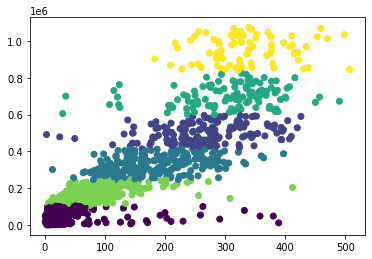

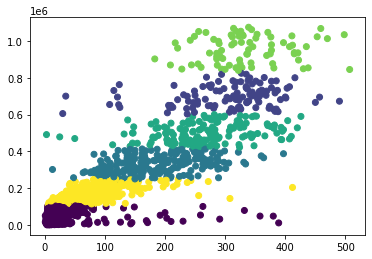

In [138]:
# Classifier KNeighborsClassified
dataset = df[['BreakPointsFaced','BreakPointsOpportunities',"Winnings"]][:5]
outcomes = [1, 0, 1, 0, 1]



classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(dataset, outcomes)

print(classifier.predict([[8, 3, 36000]]))
# print(dataset)


# Cluster KMeans
test = df[['BreakPointsFaced',"Winnings"]]

kmeans = KMeans(n_clusters = 6, init = "k-means++").fit(test)
cla = kmeans.predict(test)
print(kmeans.cluster_centers_)
plt.scatter(df.BreakPointsFaced, df.Winnings, c = kmeans.predict(test))
plt.show()


test2 = df[["Winnings", "BreakPointsFaced"]]
kmeans2 = KMeans(n_clusters = 6).fit(test2)
plt.scatter(df.BreakPointsFaced, df.Winnings, c = kmeans2.predict(test2))
plt.show()


Text(0, 0.5, 'First Serve Points Won')

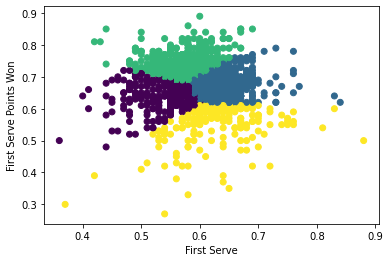

In [140]:
df_test = df[["FirstServe", "FirstServePointsWon"]]

kmeans = KMeans(n_clusters=4).fit(df_test)
cla = kmeans.predict(df_test)


plt.clf()
plt.scatter(df.FirstServe, df.FirstServePointsWon, c = cla)

plt.xlabel("First Serve")
plt.ylabel("First Serve Points Won")

